# Índice

## 1. Introducción
        1.1 Descripción del Problema
        1.2 Datos Recopilados
        1.3 Objetivos
## 2. EDA
     2.1 Descripción Conjunto de Datos
     2.2 Correlación entre las variables
## 3. Preprocesado
    3.1 Tratamiento Valores Nulos
    3.2 Selección de Variables
## 4. Clasificación 

# Análisis de Contenido Brecha Digital

Esta parte de la investigacion es meramente informativa. A partir de esta libreta sacaremos los parametros optimos para ejecutar los algoritmos en spss. 

In [1]:
# Always load all scipy stack packages
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

from plotly import graph_objs as go


# Habilita que se pueda graficar directamente desde el dataframe
import cufflinks as cf

import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly.io as pio

import seaborn as sns
sns.set(color_codes=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# This code configures matplotlib for proper rendering
%matplotlib inline
mpl.rcParams["figure.figsize"] = "8, 4"
import warnings
warnings.simplefilter("ignore")

# Semilla
seed=6342
np.random.seed(seed)

## Carga de datos

El archivo excel disponible no estaba separado por ';' , por lo cual se carga primero el archivo excel y luego se convierte a dataframe.

In [3]:
# Carga del archivo excel
xls = pd.ExcelFile(r"C:\Users\Junio\Libretas\beca investigacion\hoja_unique.xls")

# Convertir a dataframe
df = xls.parse()

# Municipio como id
df.set_index('Municipio')

# Encoding Tamaño 
labelencoder = LabelEncoder()
df['Tamanio'] = labelencoder.fit_transform(df['Tamanio'])

# Mostrar dataframe
df.sample(5,random_state=seed)

,Municipio,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Renta pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global
28,San Pedro,0,-43.0,24.4,12.13,49.11,4.3,0.000000,21.63,516.878711,NaN,0.76,0.5,0.0,0.13,1.38
12,Fuente-Álamo,1,-16.7,21.9,11.81,47.41,11.3,0.000395,19.49,0.000000,15759.0,0.75,0.7,0.0,0.00,1.45
17,Yeste,1,-27.0,37.9,8.42,48.87,0.8,0.000000,24.90,681.436907,13742.0,0.81,0.6,0.0,0.00,1.41
11,Elche de la Sierra,1,-12.1,22.0,10.64,49.81,1.9,0.000000,22.70,730.422804,17193.0,0.86,0.6,0.0,0.00,1.46
19,Alborea,0,-18.3,28.4,10.33,48.78,10.6,0.018651,19.95,443.839311,NaN,0.73,0.7,0.0,0.00,1.43


## Analisis Univariado

In [4]:
# Eliminamos Tamanio 
df.drop(columns='Tamanio').describe()

,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Renta pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,25.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,-17.668182,28.263636,9.241818,48.006136,5.912727,0.004054,16.648864,455.667550,16726.720000,0.650909,0.563636,0.015909,0.054773,1.284545
std,23.228929,11.711554,2.588167,2.111023,4.460526,0.007509,4.209967,264.553794,2851.922649,0.211636,0.135700,0.074532,0.131741,0.408295
min,-122.600000,15.700000,1.960000,41.180000,0.000000,0.000000,5.080000,0.000000,12582.000000,0.120000,0.300000,0.000000,0.000000,0.420000
25%,-25.950000,20.800000,8.157500,46.572500,2.550000,0.000000,14.505000,366.029641,14969.000000,0.620000,0.500000,0.000000,0.000000,1.095000
50%,-11.350000,25.950000,9.505000,48.675000,5.150000,0.000000,16.130000,515.966692,16437.000000,0.720000,0.600000,0.000000,0.000000,1.305000
75%,-4.325000,33.075000,11.165000,49.282500,7.632500,0.004642,19.352500,625.515606,18218.000000,0.765000,0.662500,0.000000,0.000000,1.432500
max,12.200000,83.100000,12.930000,52.010000,18.000000,0.036364,27.520000,899.019608,25423.000000,0.960000,0.900000,0.400000,0.500000,2.610000


A partir de la tabla anterior, podemos deducir cierta informacion 'a priori' de algunas variables:
* Tasa de variación de la poblacion: de media, la población decrece en un 18%. Desviación estandar muy alta, 23%.
* % >65: mucha discrepancia entre el valor medio y el máximo (15,83). Probablemente sea por las zonas rurales.
* % jovenes: bastante estable. Apenas se supera el 12%.
* % mujeres: muy estable. De media un 48%
* T. Asociacionismo: muy baja.
* P. Fiscal: puede ser 0? Inestables, desviacion de la media muy alta.
* Renta PC: (16.726 media, 25.423)
* e-info: std muy alta (20%)
* e-consulta: (0.02 media, 0.4 max)
* otros: (0.05 media, 0.5 max)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Municipio                          44 non-null     object 
 1   Tamanio                            44 non-null     int32  
 2   Tasa de variacion de la poblacion  44 non-null     float64
 3   % de poblacion > 65                44 non-null     float64
 4   % de jovenes                       44 non-null     float64
 5   % de mujeres                       44 non-null     float64
 6   % de inmigrantes extranjeros       44 non-null     float64
 7   Tasa de asociacionismo             44 non-null     float64
 8   Tasa de paro                       44 non-null     float64
 9   Presión fiscal pc                  44 non-null     float64
 10  Renta pc                           25 non-null     float64
 11  Índice de e-información            44 non-null     float64
 

**La variable 'Renta pc' tiene el 43% de los valores nulos**

In [6]:
# Echamos un vistazo para ver donde se presentan los valores nulos
renta_pc_null = df[df['Renta pc'].isnull()].drop(columns = ['Renta pc'])
renta_pc_null

,Municipio,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global
18,Abengibre,0,-17.1,30.1,8.16,52.01,5.2,0.008021,12.11,451.587393,0.78,0.70,0.0,0.00,1.48
19,Alborea,0,-18.3,28.4,10.33,48.78,10.6,0.018651,19.95,443.839311,0.73,0.70,0.0,0.00,1.43
21,Balsa Ves,0,-122.6,83.1,7.35,41.18,2.9,0.000000,15.87,773.321323,0.47,0.30,0.0,0.00,0.77
23,Carcelén,0,5.8,41.5,8.45,45.11,5.6,0.011516,18.22,734.181228,0.72,0.50,0.0,0.50,1.72
24,Casas Ves,0,-39.8,34.7,8.76,47.77,5.6,0.012739,14.84,655.671975,0.62,0.60,0.0,0.00,1.22
26,Casas de Lázaro,0,-57.9,39.1,6.98,43.30,2.0,0.000000,15.35,682.874553,0.12,0.30,0.0,0.00,0.42
27,Golosalvo,0,-9.0,34.5,3.64,46.36,6.4,0.036364,21.54,470.727273,0.58,0.50,0.0,0.00,1.08
28,San Pedro,0,-43.0,24.4,12.13,49.11,4.3,0.000000,21.63,516.878711,0.76,0.50,0.0,0.13,1.38
29,Hoya-Gonzalo,0,-34.5,28.9,9.33,46.50,3.1,0.000000,13.27,622.380575,0.70,0.40,0.0,0.00,1.10
30,Montalvos,0,-55.6,36.3,1.96,45.10,1.0,0.000000,5.08,899.019608,0.73,0.40,0.0,0.00,1.13


Al parecer esta relacionado con tamaño.

### Histogramas

In [7]:
def plot(df, ignore = 'Municipio', tipo = "hist"):
    for column in df.columns:
        if column == ignore:
            pass
        else:
            df[column].iplot(kind=tipo, title = column)

In [8]:
plot(df)

Observaciones
* Tasa de Asociacionismo 30/44 valores similares.
* Indice e-consulta 42 valores con 0.
* Indice otros 36/44 valores con 0.

**Analisis de la Varianza**

Usaremos el metodo VarianceThreshold de la libreria sickit learn de python. Este metodo organiza las variables segun su varianza, eliminando por defecto automaticamente aquellas que tengan varianza 0 (todos los valores son el mismo).

Doc:

* https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [9]:
from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold()
#sel.fit(df_discr)
#sel.variances_

**Eliminacion de Variables Innecesarias**

Pasamos a reducir la dimensionalidad del conjunto de datos eliminando aquellas variables cuyos valores se repiten demasiado (poca varianza)

In [10]:
#Eliminamos las variables que aportarn poca informacion por tener valores perdidos (Renta PC) o con muchos valores iguales a 0
df_cut = df.drop(columns=['Tasa de asociacionismo','Índice de e-consulta','Índice otros elementos','Renta pc'])
df_cut.sample(5,random_state=seed)

,Municipio,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de paro,Presión fiscal pc,Índice de e-información,Índice de e-participación,Índice global
28,San Pedro,0,-43.0,24.4,12.13,49.11,4.3,21.63,516.878711,0.76,0.5,1.38
12,Fuente-Álamo,1,-16.7,21.9,11.81,47.41,11.3,19.49,0.000000,0.75,0.7,1.45
17,Yeste,1,-27.0,37.9,8.42,48.87,0.8,24.90,681.436907,0.81,0.6,1.41
11,Elche de la Sierra,1,-12.1,22.0,10.64,49.81,1.9,22.70,730.422804,0.86,0.6,1.46
19,Alborea,0,-18.3,28.4,10.33,48.78,10.6,19.95,443.839311,0.73,0.7,1.43


##  Matriz de Correlacion

El coeficiente de correlación es una medida del grado de dependencia lineal entre dos variables. El coeficiente de correlación oscila entre -1 y 1. Un valor de 1 significa que una ecuación lineal describe la relación entre las dos variables a la perfección, con todos los puntos de datos cayendo sobre una línea recta de pendiente positiva. Un valor de -1 implica que todos los puntos de datos se encuentran en una línea con pendiente negativa. Un valor de 0 implica que no existe una correlación lineal entre las variables. Lo podemos calcular con el método corr.

En lugar de usar solamente el coeficiente de correlacion por defecto, he decidido usar tambien el de 'spearman', ya que este es mas 'flexible' que el de pearson en cuanto a la linealidad de la correlacion.

In [11]:
# coeficiente de correlación de pearson
corr = df_cut.corr()
#corr = corr.sort_values()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de paro,Presión fiscal pc,Índice de e-información,Índice de e-participación,Índice global
Tamanio,1.00,0.30,-0.54,0.53,0.56,0.24,0.02,-0.13,0.28,0.52,0.51
Tasa de variacion de la poblacion,0.30,1.00,-0.74,0.44,0.65,0.40,0.11,-0.15,0.32,0.49,0.42
% de poblacion > 65,-0.54,-0.74,1.00,-0.62,-0.79,-0.41,-0.09,0.21,-0.27,-0.55,-0.42
% de jovenes,0.53,0.44,-0.62,1.00,0.61,0.49,0.29,-0.20,0.28,0.48,0.40
% de mujeres,0.56,0.65,-0.79,0.61,1.00,0.36,0.11,-0.18,0.36,0.63,0.50
% de inmigrantes extranjeros,0.24,0.40,-0.41,0.49,0.36,1.00,-0.09,-0.16,0.00,0.33,0.17
Tasa de paro,0.02,0.11,-0.09,0.29,0.11,-0.09,1.00,0.10,0.08,0.03,-0.00
Presión fiscal pc,-0.13,-0.15,0.21,-0.20,-0.18,-0.16,0.10,1.00,0.12,-0.15,0.01
Índice de e-información,0.28,0.32,-0.27,0.28,0.36,0.00,0.08,0.12,1.00,0.44,0.80
Índice de e-participación,0.52,0.49,-0.55,0.48,0.63,0.33,0.03,-0.15,0.44,1.00,0.75


In [12]:
# Exportamos el dataframe de correlacion 
corr.to_csv('pearson_corr.csv')

In [13]:
# coeficiente de correlación de spearman
corr = df_cut.corr(method='spearman')
#corr = corr.sort_values()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de paro,Presión fiscal pc,Índice de e-información,Índice de e-participación,Índice global
Tamanio,1.00,0.29,-0.75,0.59,0.67,0.31,0.03,-0.15,0.44,0.48,0.46
Tasa de variacion de la poblacion,0.29,1.00,-0.43,0.33,0.36,0.45,-0.04,-0.06,0.24,0.32,0.39
% de poblacion > 65,-0.75,-0.43,1.00,-0.79,-0.77,-0.56,0.03,0.29,-0.33,-0.52,-0.40
% de jovenes,0.59,0.33,-0.79,1.00,0.65,0.55,0.21,-0.36,0.38,0.41,0.41
% de mujeres,0.67,0.36,-0.77,0.65,1.00,0.40,0.03,-0.23,0.43,0.56,0.49
% de inmigrantes extranjeros,0.31,0.45,-0.56,0.55,0.40,1.00,-0.11,-0.26,-0.03,0.37,0.25
Tasa de paro,0.03,-0.04,0.03,0.21,0.03,-0.11,1.00,0.05,0.20,-0.03,0.10
Presión fiscal pc,-0.15,-0.06,0.29,-0.36,-0.23,-0.26,0.05,1.00,0.00,-0.08,0.08
Índice de e-información,0.44,0.24,-0.33,0.38,0.43,-0.03,0.20,0.00,1.00,0.44,0.78
Índice de e-participación,0.48,0.32,-0.52,0.41,0.56,0.37,-0.03,-0.08,0.44,1.00,0.75


In [14]:
# Exportamos el dataframe de correlacion 
corr.to_csv('spearman_corr.csv')

**Observaciones:**
* Tasa de Variacion esta relacionada con el porcentaje de mayores de 65 años y el de mujeres.
* % >65 años esta relacionado con porcentaje de mujeres y jovenes.
* % mujeres relacionado con e-participacion
* e-info relacionado pobremente con e-participacion. Al parecer la informacion que se proporciona no esta relacionada con la particion (0.44)

## Analisis Bivariado

### PairScatterPlot

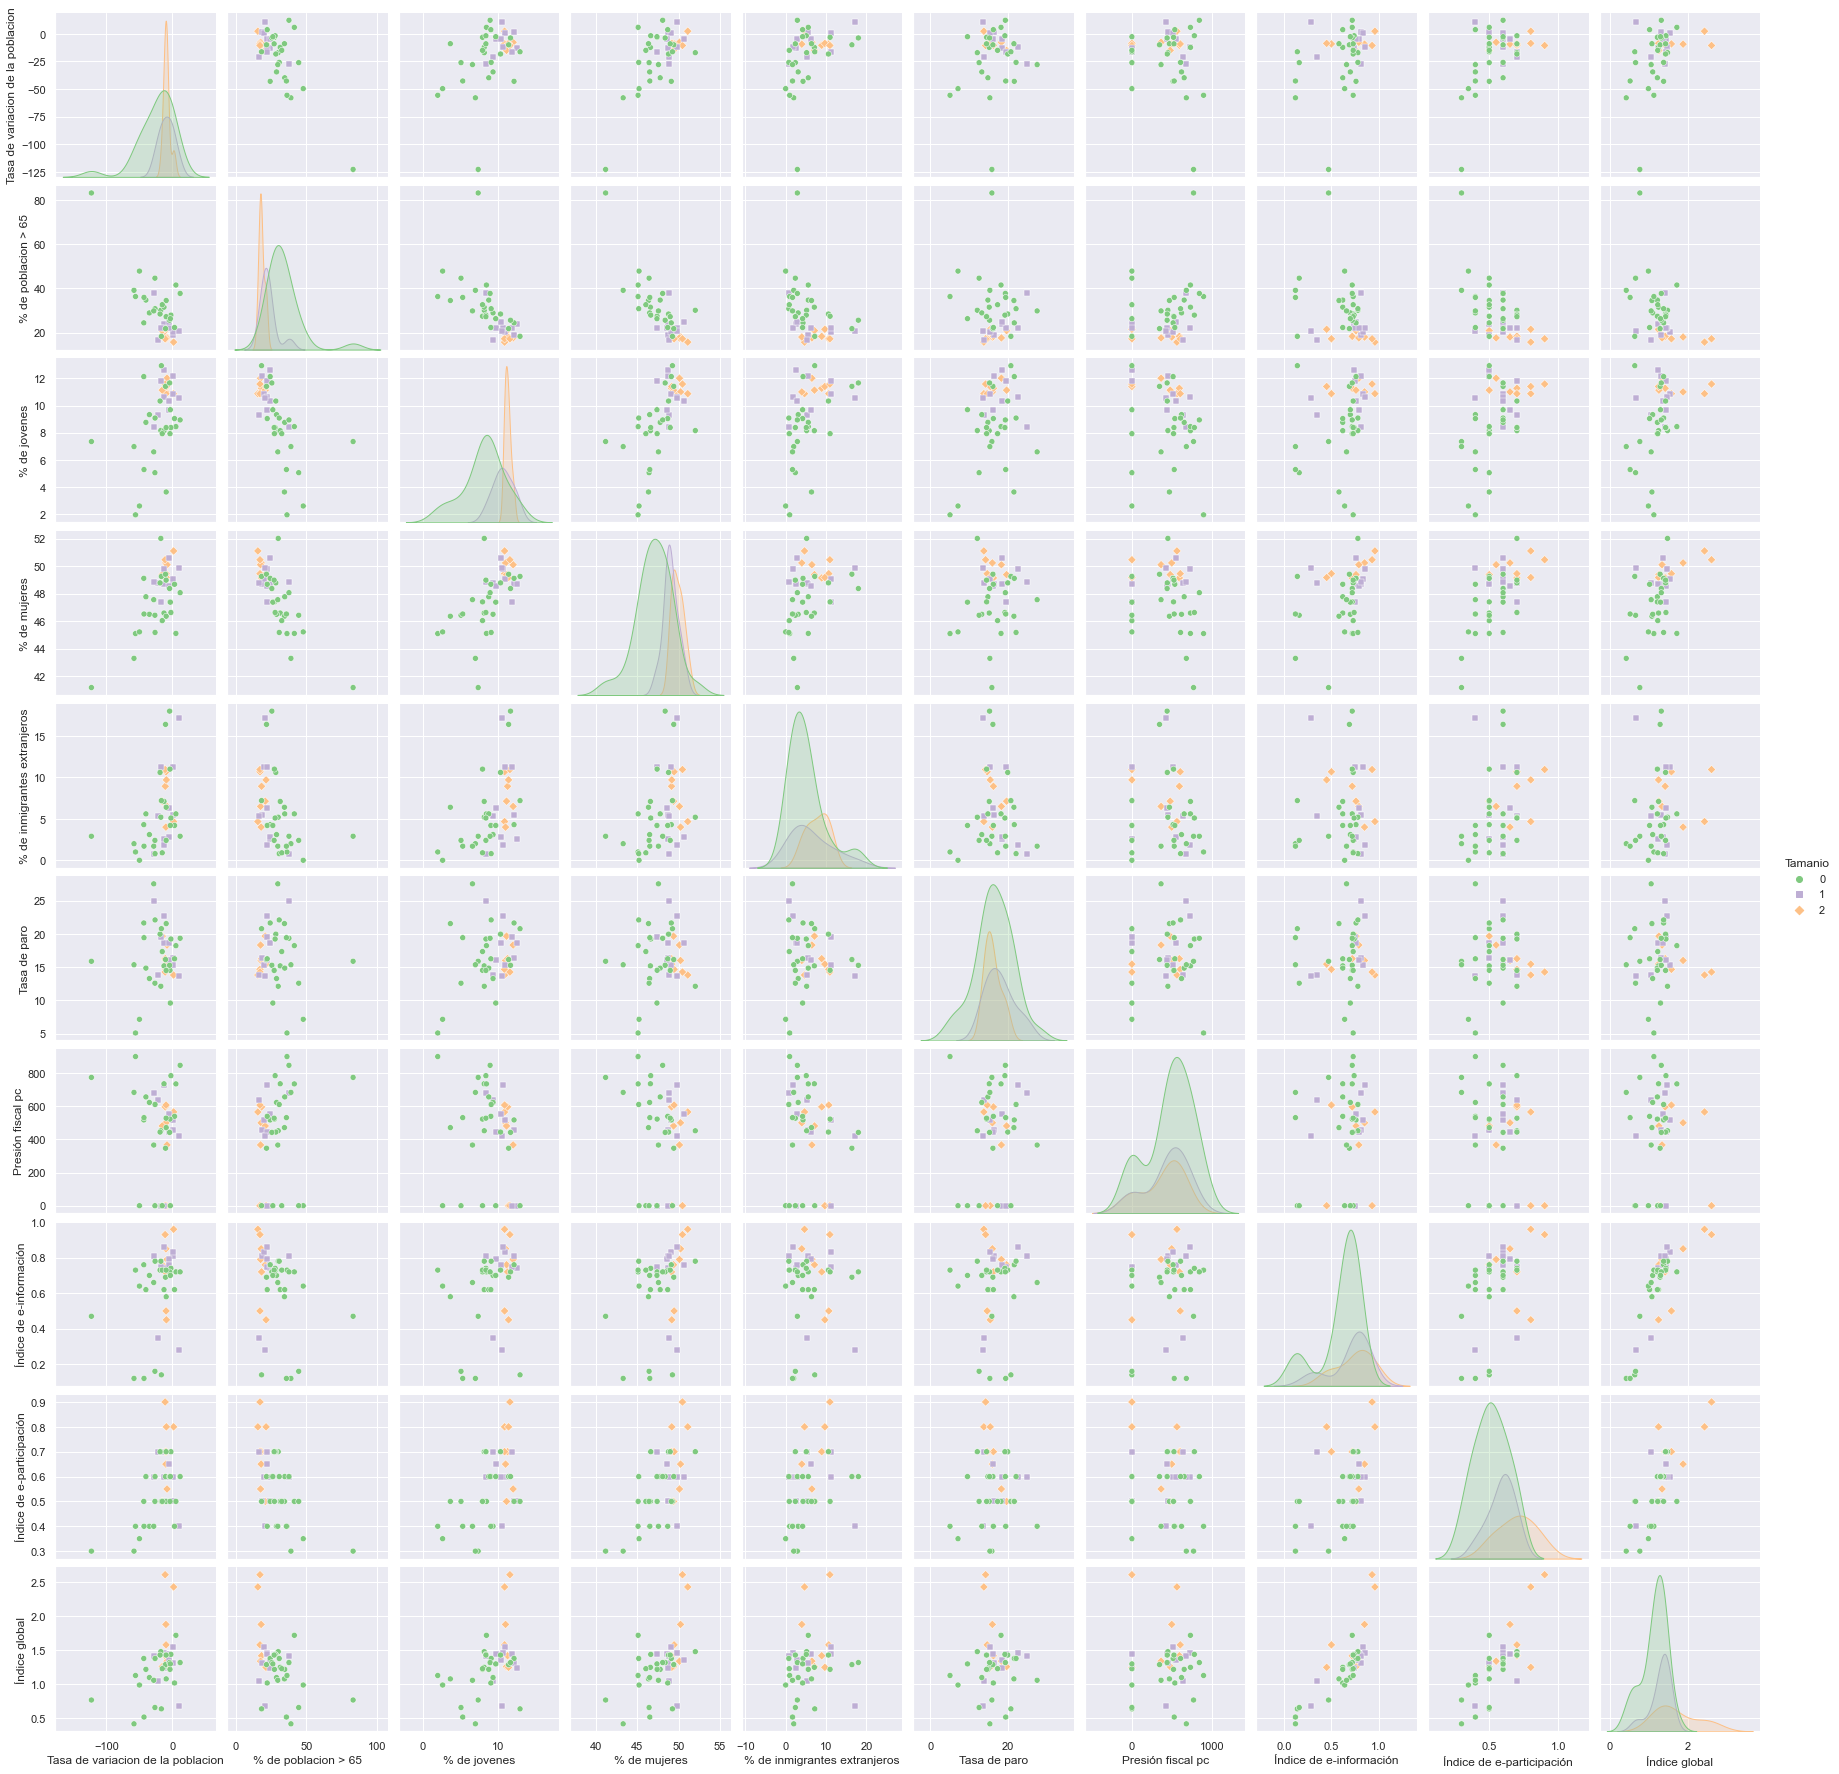

In [15]:
sns.pairplot(df_cut,hue="Tamanio",markers=["o", "s", "D"],palette="Accent")
plt.show()

In [16]:
import plotly.graph_objs as go

fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='T.Var', values=df_cut['Tasa de variacion de la poblacion']),
                              dict(label='%>65', values=df_cut['% de poblacion > 65']),
                              dict(label='%jov', values=df_cut['% de jovenes']),
                              dict(label='%muj', values=df_cut['% de mujeres']),
                              dict(label='%extr', values=df_cut['% de inmigrantes extranjeros']),
                              dict(label='T.Paro', values=df_cut['Tasa de paro']),
                              dict(label='P.F.C', values=df_cut['Presión fiscal pc']),
                              dict(label='e-info', values=df_cut['Índice de e-información']),
                              dict(label='e-parti', values=df_cut['Índice de e-participación']),
                              dict(label='global', values=df_cut['Índice global'])],
                              
                  marker=dict(color=df_cut['Tamanio'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  #text="textd",
                  diagonal=dict(visible=False)))

title = "Nube de Puntos Bivariada"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig.show()

De momento no se ven agrupamientos.

In [17]:
#df_biv = df_cut.rename(columns={x:y for x,y in zip(df_cut.columns,range(0,len(df_cut.columns)))})
#df_biv

## Preprocesado

Veamos si podemos elaborar un imputer para 'recuperar' los valores nulos de Renta pc. Para ello, veremos si es mejor usar la media, un arbol de regresion, o los vecinos mas cercanos. Midiendo la desviacion estandar en el caso de la media y el error absoluto medio de los clasificadores, veremos si es asumible o no rellenar los valores nulos. Para entrenar los clasificadores, usaremos aquellos casos donde no hay valores nulos, extrayendo anteriormente el conjunto test para evaluar el imputer. Ademas, evaluaremos las variables segun su relacion con 'Renta pc' para hacer una seleccion y ver si esto mejora los resultados.

### Seleccion de Casos

In [18]:
# Para sacar el imputer trabajaremos con aquellos valores donde Renta PC no es nula. Que es la resta del conjunto total - renta pc esd nula
df_imp = df.merge(renta_pc_null, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
df_imp.set_index('Municipio')

,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Renta pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global,_merge
Municipio,,,,,,,,,,,,,,,,
Albacete,2,2.3,15.7,10.87,51.10,4.67,0.002882,13.80,564.996861,25423.0,0.96,0.80,0.3,0.38,2.43,left_only
Almansa,2,-9.4,18.0,11.00,50.23,4.00,0.000326,15.99,499.715053,20950.0,0.85,0.65,0.0,0.38,1.88,left_only
Caudete,2,-10.4,18.3,11.27,49.14,8.93,0.001199,16.26,595.462645,18218.0,0.72,0.70,0.0,0.00,1.42,left_only
Hellín,2,-7.7,17.6,12.01,50.10,6.50,0.000298,18.31,366.167506,17980.0,0.79,0.55,0.0,0.00,1.34,left_only
Roda (La),2,-9.2,17.2,10.87,49.45,10.68,0.000000,14.65,606.661222,19176.0,0.50,0.70,0.0,0.38,1.58,left_only
Tarazona Mancha,2,-15.0,20.9,11.13,49.38,7.13,0.000000,19.65,480.677353,16230.0,0.76,0.50,0.0,0.00,1.26,left_only
Tobarra,2,-8.7,21.5,11.40,49.17,9.70,0.008641,15.44,0.000000,16437.0,0.45,0.80,0.0,0.00,1.25,left_only
Villarrobledo,2,-10.6,17.2,11.58,50.46,10.95,0.003515,14.25,0.000000,19684.0,0.93,0.90,0.4,0.38,2.61,left_only
Balazote,1,1.7,18.8,12.17,48.72,5.50,0.000000,16.36,457.364255,17728.0,0.81,0.50,0.0,0.00,1.31,left_only


In [19]:
# Vemos informacion general donde existe la renta PC
df_imp.drop(columns=['Tamanio','_merge']).describe()

,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Renta pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global
count,25.000000,25.0000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,-8.864000,22.1400,10.588400,48.929200,7.134400,0.001300,16.896000,412.129162,16726.720000,0.688400,0.606000,0.02800,0.071200,1.392800
std,8.934711,5.2904,1.365994,1.328639,4.378851,0.002527,3.374739,255.074127,2851.922649,0.200929,0.121895,0.09798,0.142107,0.425172
min,-27.000000,15.7000,7.930000,45.180000,0.800000,0.000000,9.580000,0.000000,12582.000000,0.140000,0.400000,0.00000,0.000000,0.640000
25%,-12.800000,18.3000,9.680000,48.670000,4.200000,0.000000,14.650000,346.486577,14969.000000,0.620000,0.500000,0.00000,0.000000,1.250000
50%,-9.400000,21.5000,10.870000,49.140000,6.500000,0.000000,16.130000,499.715053,16437.000000,0.750000,0.600000,0.00000,0.000000,1.340000
75%,-3.200000,24.1000,11.410000,49.810000,10.680000,0.001506,18.600000,595.462645,18218.000000,0.810000,0.700000,0.00000,0.000000,1.450000
max,10.300000,37.9000,12.930000,51.100000,17.200000,0.009228,24.900000,734.825291,25423.000000,0.960000,0.900000,0.40000,0.380000,2.610000


https://kanoki.org/2019/07/04/pandas-difference-between-two-dataframes/

In [20]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 42
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Municipio                          25 non-null     object  
 1   Tamanio                            25 non-null     int32   
 2   Tasa de variacion de la poblacion  25 non-null     float64 
 3   % de poblacion > 65                25 non-null     float64 
 4   % de jovenes                       25 non-null     float64 
 5   % de mujeres                       25 non-null     float64 
 6   % de inmigrantes extranjeros       25 non-null     float64 
 7   Tasa de asociacionismo             25 non-null     float64 
 8   Tasa de paro                       25 non-null     float64 
 9   Presión fiscal pc                  25 non-null     float64 
 10  Renta pc                           25 non-null     float64 
 11  Índice de e-información            25 non-null 

### Seleccion de Variables para imputer

In [21]:
# coeficiente de correlación de spearman
corr = df_imp.corr(method='spearman')
#corr = corr.sort_values()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,Tamanio,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Renta pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global
Tamanio,1.00,0.04,-0.66,0.42,0.64,0.09,0.39,-0.08,-0.05,0.72,0.37,0.55,0.37,0.39,0.54
Tasa de variacion de la poblacion,0.04,1.00,-0.16,-0.09,0.23,0.23,-0.12,-0.54,-0.16,0.19,0.05,-0.19,0.13,0.14,-0.01
% de poblacion > 65,-0.66,-0.16,1.00,-0.52,-0.62,-0.33,-0.40,0.35,0.16,-0.83,-0.09,-0.44,-0.44,-0.44,-0.29
% de jovenes,0.42,-0.09,-0.52,1.00,0.38,0.27,0.43,0.21,-0.66,0.36,0.08,0.13,0.16,0.01,0.11
% de mujeres,0.64,0.23,-0.62,0.38,1.00,0.10,0.23,-0.08,-0.05,0.53,0.28,0.28,0.45,0.37,0.36
% de inmigrantes extranjeros,0.09,0.23,-0.33,0.27,0.10,1.00,0.19,-0.42,-0.40,0.14,-0.35,0.07,0.07,0.14,-0.09
Tasa de asociacionismo,0.39,-0.12,-0.40,0.43,0.23,0.19,1.00,-0.23,-0.39,0.34,0.08,0.61,0.42,0.11,0.19
Tasa de paro,-0.08,-0.54,0.35,0.21,-0.08,-0.42,-0.23,1.00,0.11,-0.23,0.21,-0.23,-0.37,-0.46,0.01
Presión fiscal pc,-0.05,-0.16,0.16,-0.66,-0.05,-0.40,-0.39,0.11,1.00,0.00,0.14,0.01,-0.10,0.18,0.17
Renta pc,0.72,0.19,-0.83,0.36,0.53,0.14,0.34,-0.23,0.00,1.00,0.39,0.53,0.45,0.58,0.56


### Preparacion del Dataframe

In [22]:
# Codificamos Tamaño para que el arbol funcione correctamente
df_imp_enc = pd.get_dummies(df_imp, columns=["Tamanio"]).set_index('Municipio')
df_imp_enc.sample(5,random_state=seed)

,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Renta pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global,_merge,Tamanio_0,Tamanio_1,Tamanio_2
Municipio,,,,,,,,,,,,,,,,,,
Tobarra,-8.7,21.5,11.40,49.17,9.70,0.008641,15.44,0.000000,16437.0,0.45,0.8,0.0,0.00,1.25,left_only,0,0,1
Villarrobledo,-10.6,17.2,11.58,50.46,10.95,0.003515,14.25,0.000000,19684.0,0.93,0.9,0.4,0.38,2.61,left_only,0,0,1
Villamalea,10.3,20.5,10.57,49.85,17.20,0.000000,13.64,422.138700,14969.0,0.28,0.4,0.0,0.00,0.68,left_only,0,1,0
Barrax,-16.3,18.3,12.93,49.25,7.20,0.000000,20.77,0.000000,16527.0,0.14,0.5,0.0,0.00,0.64,left_only,1,0,0
Ossa Montiel,-4.5,24.6,10.33,50.60,2.80,0.000000,18.60,554.190734,15148.0,0.76,0.6,0.0,0.00,1.36,left_only,0,1,0


https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

**Metodo General de entremiento/test de los imputers**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

def imputer_sel(clf,df=df_imp_enc,seleccion=False):
    # Dataframe donde guardamos los resultados
    res = pd.DataFrame()
    
    # Seleccion o no de variables correlacionadas con renta pc
    if seleccion:
        # Seleccionamos aquellas variables mas relacionadas con renta pc. coef>0.5
        df_sel = df[['Tamanio_0','Tamanio_1','Tamanio_2','% de poblacion > 65','% de mujeres','Índice de e-participación',
                    'Índice otros elementos','Índice global']]
        
        #Dividimos train/test 
        X_train, X_test, y_train, y_test = train_test_split(
        df_sel,df['Renta pc'],test_size=0.1, random_state=seed)
        
    else:
        #Dividimos train/test 
        X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['Renta pc','_merge']),df['Renta pc'],test_size=0.1, random_state=seed)
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    error = metrics.mean_absolute_error(y_test, y_pred)
    #print('Mean Absolute Error:', score,clf)
    return error

**Creacion y Evaluacion de los imputers**

In [24]:
# Creamos los imputers candidatos
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

from sklearn.tree import DecisionTreeRegressor
ar = DecisionTreeRegressor(random_state=seed)

* https://towardsdatascience.com/modelling-regression-trees-b376e959d02e
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [25]:
# Guardamos y mostramos los errores de los imputers
res = pd.DataFrame(columns=['imputer','error'])
res = res.append({'imputer': 'media', 'error': df_imp['Renta pc'].std()}, ignore_index=True)
res = res.append({'imputer': 'knn', 'error': imputer_sel(knn)}, ignore_index=True)
res = res.append({'imputer': 'arbol', 'error': imputer_sel(ar)}, ignore_index=True)
res = res.append({'imputer': 'knn_sel', 'error': imputer_sel(knn,seleccion=True)}, ignore_index=True)
res = res.append({'imputer': 'arbol_sel', 'error': imputer_sel(ar,seleccion=True)}, ignore_index=True)

# Ordenamos de menor a mayor error
res.sort_values(by='error')

,imputer,error
4,arbol_sel,2501.333333
3,knn_sel,2751.000000
0,media,2851.922649
1,knn,3959.000000
2,arbol,3975.666667


Viendo que el error que cometemos con el arbol de regresion mejora la desviacion estandar, podriamos utilizarlos para rellenar los valores perdidos.

### Ejecucion del Imputer

Primero entrenamos el imputer seleccionado con aquellos ejemplos que no presenten valores nulos en 'Renta pc'. Luego usamos un dataframe auxiliar para extraer los casos donde es necesario predecir la renta (valores nulos). Usamos el clasificador ya entrenado para predecir los valores, y finalmente pegamos los resultados.

In [26]:
# Seleccionamos aquellas variables mas relacionadas con renta pc. coef>0.5
X_train = df_imp_enc[['Tamanio_0','Tamanio_1','Tamanio_2','% de poblacion > 65','% de mujeres','Índice de e-participación',
             'Índice otros elementos','Índice global']]

# Variable objetrivo la de los valores perdidos
y_train = df_imp_enc['Renta pc']

# Entrenamos el imputer seleccionado
ar.fit(X_train,y_train)

# Valores a predecir donde renta pc es nula
df_aux = pd.get_dummies(df, columns=["Tamanio"])
X_imp = df_aux[df_aux['Renta pc'].isnull()][['Tamanio_0','Tamanio_1','Tamanio_2','% de poblacion > 65','% de mujeres','Índice de e-participación',
             'Índice otros elementos','Índice global']]


# Predecimos los valores perdidos
y_imp = ar.predict(X_imp)

# Obtenemos el dataframe con los valores imputados
df_final = df_aux[df_aux['Renta pc'].isnull()].drop(columns=['Renta pc'])
df_final['Renta pc'] = y_imp
df_final.set_index('Municipio')

,Tasa de variacion de la poblacion,% de poblacion > 65,% de jovenes,% de mujeres,% de inmigrantes extranjeros,Tasa de asociacionismo,Tasa de paro,Presión fiscal pc,Índice de e-información,Índice de e-participación,Índice de e-consulta,Índice otros elementos,Índice global,Tamanio_0,Tamanio_1,Tamanio_2,Renta pc
Municipio,,,,,,,,,,,,,,,,,
Abengibre,-17.1,30.1,8.16,52.01,5.2,0.008021,12.11,451.587393,0.78,0.70,0.0,0.00,1.48,1,0,0,13029.0
Alborea,-18.3,28.4,10.33,48.78,10.6,0.018651,19.95,443.839311,0.73,0.70,0.0,0.00,1.43,1,0,0,13029.0
Balsa Ves,-122.6,83.1,7.35,41.18,2.9,0.000000,15.87,773.321323,0.47,0.30,0.0,0.00,0.77,1,0,0,14056.0
Carcelén,5.8,41.5,8.45,45.11,5.6,0.011516,18.22,734.181228,0.72,0.50,0.0,0.50,1.72,1,0,0,13742.0
Casas Ves,-39.8,34.7,8.76,47.77,5.6,0.012739,14.84,655.671975,0.62,0.60,0.0,0.00,1.22,1,0,0,14056.0
Casas de Lázaro,-57.9,39.1,6.98,43.30,2.0,0.000000,15.35,682.874553,0.12,0.30,0.0,0.00,0.42,1,0,0,14056.0
Golosalvo,-9.0,34.5,3.64,46.36,6.4,0.036364,21.54,470.727273,0.58,0.50,0.0,0.00,1.08,1,0,0,14056.0
San Pedro,-43.0,24.4,12.13,49.11,4.3,0.000000,21.63,516.878711,0.76,0.50,0.0,0.13,1.38,1,0,0,16437.0
Hoya-Gonzalo,-34.5,28.9,9.33,46.50,3.1,0.000000,13.27,622.380575,0.70,0.40,0.0,0.00,1.10,1,0,0,14501.0


In [27]:
# Pegamos los resultados para obtener el dataframe completo
df_def = pd.concat([df_imp_enc.drop(columns=['_merge']),df_final.set_index('Municipio')])
#df_def

## Clustering

Una vez preprocesado el conjunto de datos vamos a realizar dos tecnicas de clustering: k-means optimizando el numero de centroides y clustering jerarquico.

In [28]:
# Preparamos el dataframe eliminando las variables categoricas
df_biv = df_cut.drop(columns=["Municipio","Tamanio"])

### PCA y Visualizacion

Comprobemos si es posible la agrupacion visualmente despues de reducir la dimensionalidad.

In [30]:
from sklearn.decomposition import PCA
import plotly.express as px

features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df_biv)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df_cut["Tamanio"].astype(str)
)
fig.update_traces(diagonal_visible=False)
fig.show()

### K-means

Para optmimizar el numero de cluster utilizaremos la funcion score() que nos devuelve el negativo del error cuadratico medio de la suma de todas las distancias de cada elemento que pertenezca al cluster a su centroide. Para ello veremos una grafica que nos indicara cuando converge este score y asi poder hallar el numero de cluster optimo.

Doc: 
* https://scikit-learn.org/stable/modules/clustering.html
* https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn
* https://en.wikipedia.org/wiki/K-means_clustering#Description
* https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/cluster/k_means_.py#L893
* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

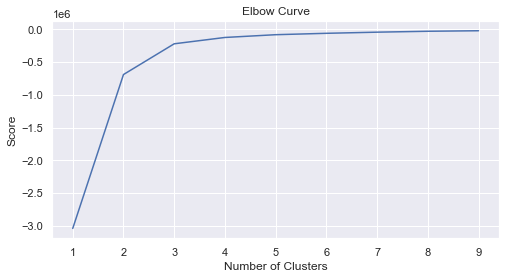

In [31]:
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(df_biv).score(df_biv) for i in range(len(kmeans))]
score

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Podemos concluir que los mejores valores son k = 2 o k = 3

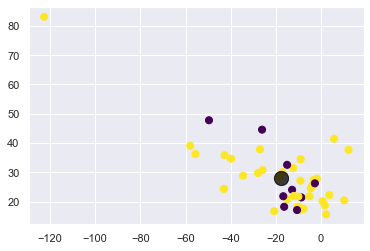

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_biv)
y_kmeans = kmeans.predict(df_biv)

plt.scatter(df_biv.iloc[:, 0], df_biv.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

No parece que funciones el clustering

### Extrayendo los csv para enviar. 

In [33]:
# Exportamos el dataframe final con el imputer
df_def.to_csv('imputer.csv')